In [194]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [195]:
os.chdir('/Users/eekaiboon/work/msai_f24_csml/final_report')

In [196]:
df_train = pd.read_csv('train.csv')

In [197]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Go through the variables to gain some intuition about how they might affect sales price. Try myself as potential buyer and think about if those variables intuitively matter. Also, on the look out for variables that bring similar information.

In [198]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

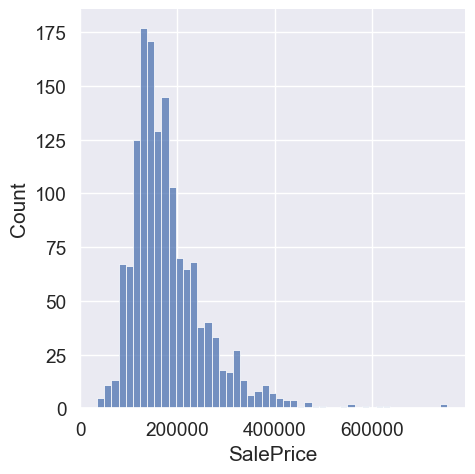

In [199]:
sns.displot(df_train['SalePrice'])

In [200]:
df_train['SalePrice'].skew()

1.8828757597682129

The skewness value of a dataset provides insights into the symmetry of the data distribution. In your case, df_train['SalePrice'].skew() returns a skewness value of approximately 1.88. Here's how to interpret this:

Positive Skewness (1.88): A skewness of 1.88 indicates that the distribution of the 'SalePrice' is positively skewed. This means that the distribution has a longer tail on the right side. In simpler terms, most of the sale prices are clustered towards the lower end, but there are a few properties with significantly higher prices pulling the tail towards the right.

Degree of Skewness:

- Skewness ≈ 0: The data is approximately symmetric.
- Skewness > 0: The data is positively skewed (right-skewed).
- Skewness < 0: The data is negatively skewed (left-skewed).

Generally, skewness values greater than +1 or less than -1 indicate a highly skewed distribution. Values between -0.5 and 0.5 suggest a nearly symmetrical distribution.

Since 1.88 is significantly greater than 1, the 'SalePrice' data is highly positively skewed, suggesting that many properties are sold at lower prices, with fewer properties sold at very high prices.

Possible Next Steps:

If the skewness is affecting your analysis (e.g., regression models often perform better with normally distributed data), you might consider transforming the data (e.g., applying a log transformation) to reduce skewness and achieve a more normal distribution.

In [201]:
df_train['SalePrice'].kurt()

6.536281860064529

The kurtosis of a distribution provides insight into the "tailedness" or the presence of outliers in the data. In your case, df_train['SalePrice'].kurt() yields a value of approximately 6.54. Here's how to interpret this:

- Kurtosis > 3 (Leptokurtic): A kurtosis value greater than 3 indicates that the distribution has heavier tails and a sharper peak compared to a normal distribution. This means there are more outliers (extremely high or low values) in the dataset. The higher the kurtosis, the more prone the dataset is to have extreme values.
- Kurtosis ≈ 6.54: Since this value is significantly greater than 3, it suggests that the 'SalePrice' distribution is leptokurtic. The distribution of sale prices has a sharp peak and longer, fatter tails, implying the presence of properties with prices that are much higher or lower than the majority.

Implications: A high kurtosis value indicates a higher risk of encountering extreme values or outliers in the data. When modeling or analyzing such data, you might need to consider strategies to handle these outliers, such as using robust statistical methods or transforming the data (e.g., log transformation) to reduce their impact.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

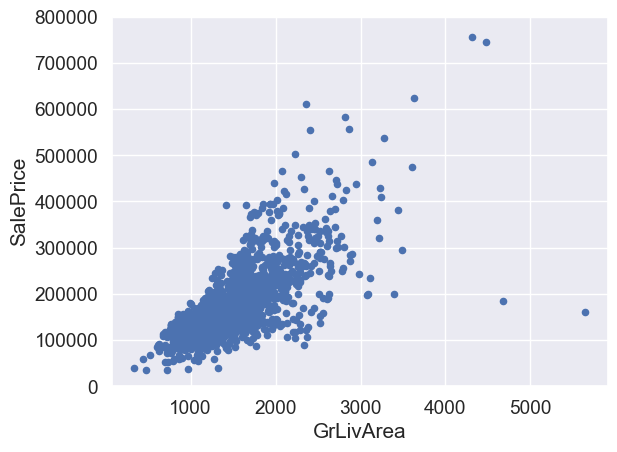

In [202]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

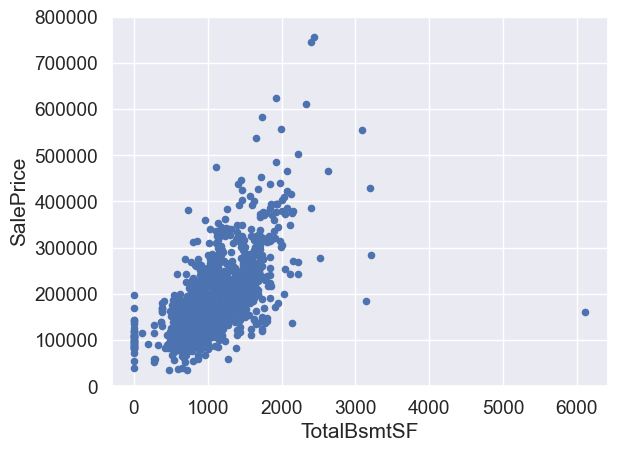

In [203]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [204]:
df_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

Seaborn documentation:
1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://seaborn.pydata.org/tutorial/color_palettes.html

(-0.5, 9.5, 0.0, 800000.0)

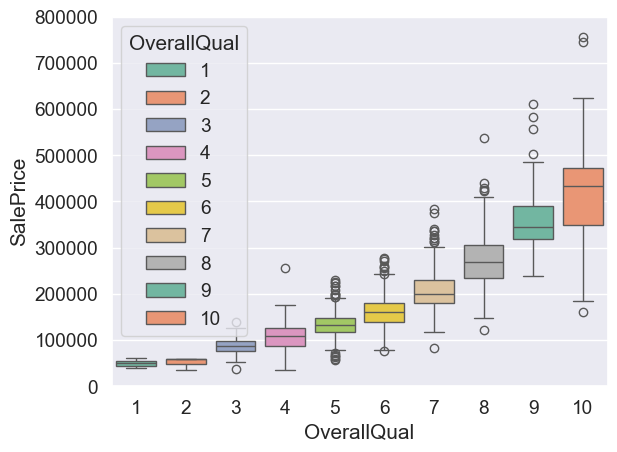

In [205]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', hue=var, data=data, palette='Set2')
fig.axis(ymin=0, ymax=800000)

(-0.5, 111.5, 0.0, 800000.0)

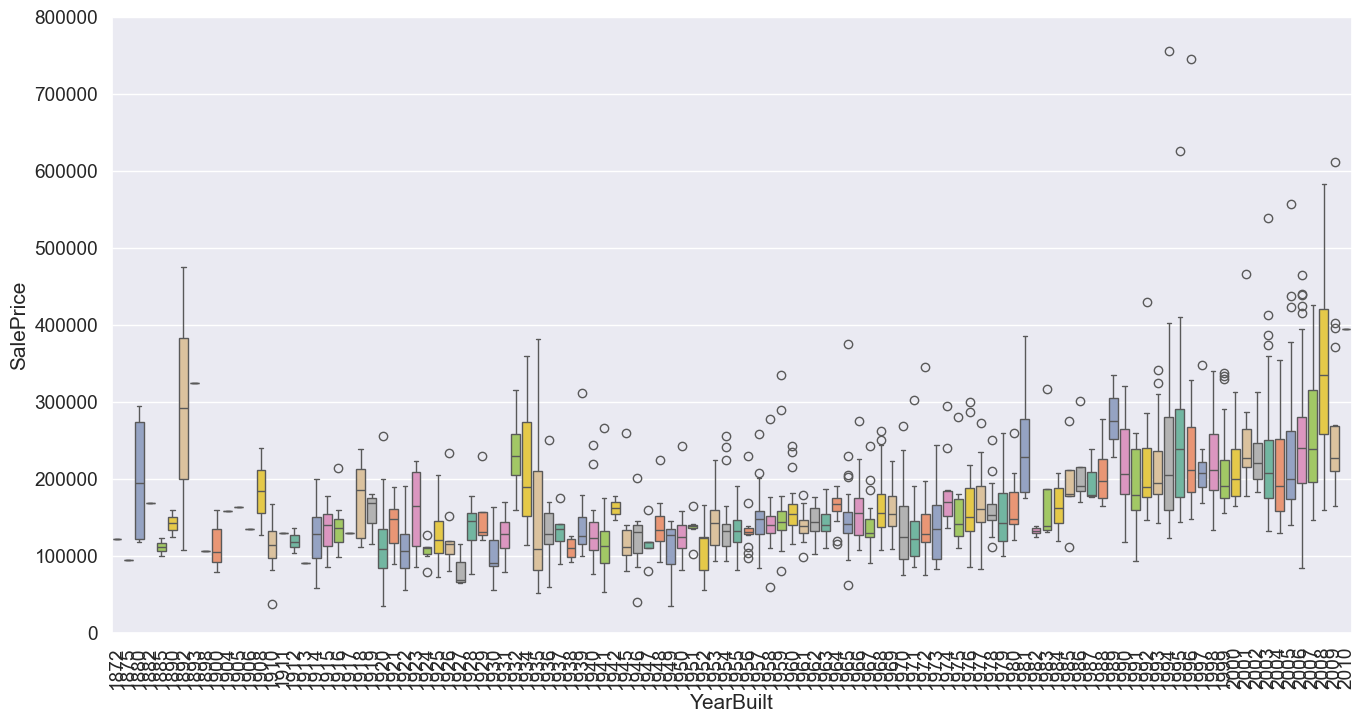

In [206]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y='SalePrice', hue=var, data=data, palette='Set2', legend=False)
fig.axis(ymin=0, ymax=800000)

Constant prices (also known as real prices or inflation-adjusted prices) are prices that have been adjusted to remove the effects of inflation over time. By converting nominal (current) prices into constant prices, it becomes possible to make meaningful comparisons of values across different time periods. This adjustment ensures that changes in prices reflect true changes in value rather than simply being the result of inflation.

In [207]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [208]:
for col in df_train.columns:
    print(f"Column '{col}' has type: {df_train[col].dtype}")

Column 'Id' has type: int64
Column 'MSSubClass' has type: int64
Column 'MSZoning' has type: object
Column 'LotFrontage' has type: float64
Column 'LotArea' has type: int64
Column 'Street' has type: object
Column 'Alley' has type: object
Column 'LotShape' has type: object
Column 'LandContour' has type: object
Column 'Utilities' has type: object
Column 'LotConfig' has type: object
Column 'LandSlope' has type: object
Column 'Neighborhood' has type: object
Column 'Condition1' has type: object
Column 'Condition2' has type: object
Column 'BldgType' has type: object
Column 'HouseStyle' has type: object
Column 'OverallQual' has type: int64
Column 'OverallCond' has type: int64
Column 'YearBuilt' has type: int64
Column 'YearRemodAdd' has type: int64
Column 'RoofStyle' has type: object
Column 'RoofMatl' has type: object
Column 'Exterior1st' has type: object
Column 'Exterior2nd' has type: object
Column 'MasVnrType' has type: object
Column 'MasVnrArea' has type: float64
Column 'ExterQual' has type: 

The Dummy Variable Trap:

The dummy variable trap occurs when one or more of the new columns are redundant because they can be predicted using the other columns. In the example above, knowing the values of any two columns is enough to deduce the third.

For instance, if Category_A = 1 and Category_B = 0, then it must be true that Category_C = 0. This situation introduces perfect multicollinearity, where one column is a linear combination of others, which can cause issues in certain statistical models (like linear regression) because it makes the model parameters difficult to estimate correctly.

TODO: One-hot encode categorical data

In [209]:
df_train_numeric = df_train.select_dtypes(include=['number'])
df_train_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


<Axes: >

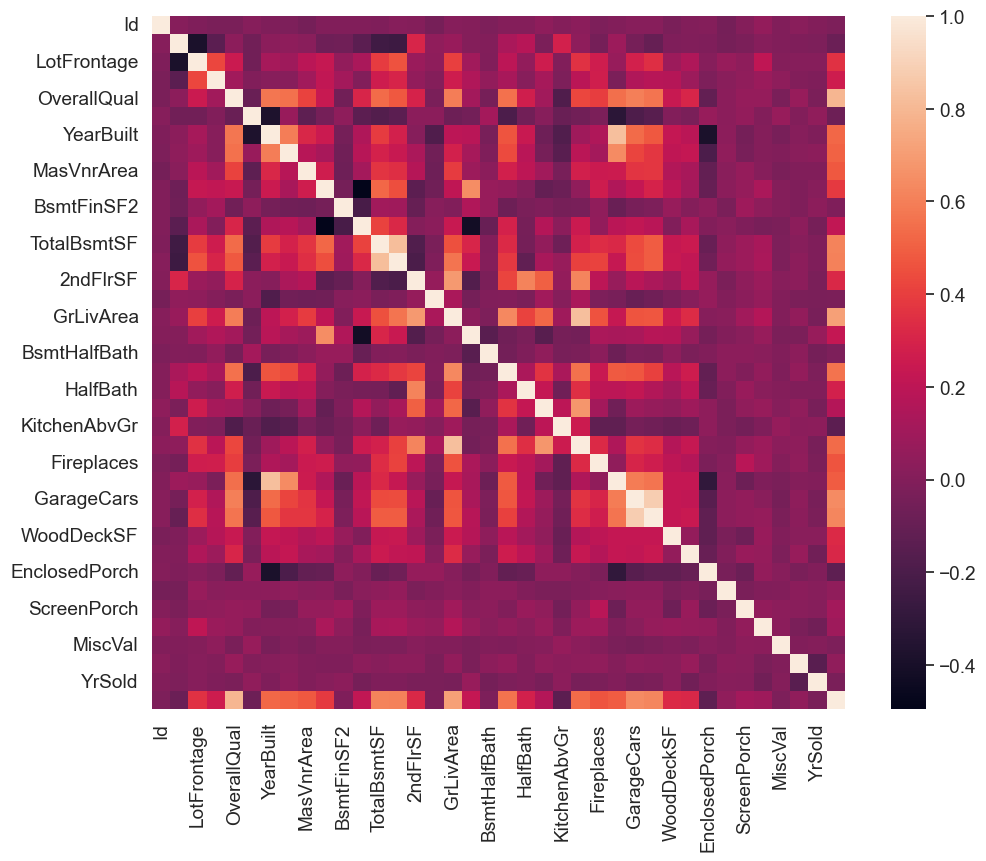

In [210]:
corrmat = df_train_numeric.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)

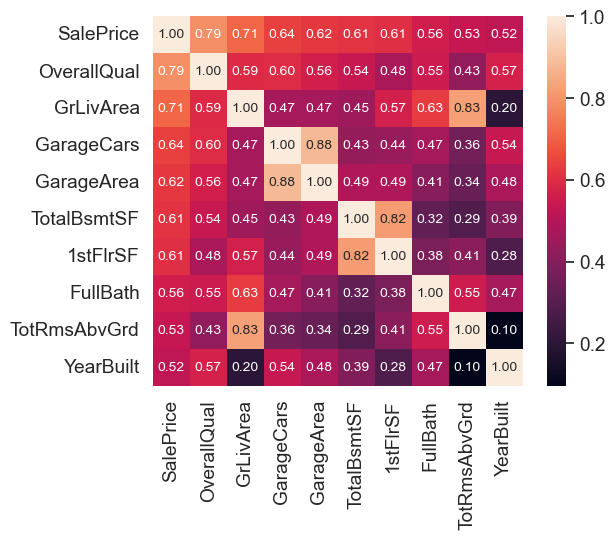

In [211]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm  = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [212]:
yearly_data = df_train.groupby('YearBuilt')['SalePrice'].mean().reset_index()
yearly_data

,YearBuilt,SalePrice
0,1872,122000.000000
1,1875,94000.000000
2,1880,200619.750000
3,1882,168000.000000
4,1885,111250.000000
...,...,...
107,2006,251775.447761
108,2007,255362.734694
109,2008,348849.130435
110,2009,269220.000000


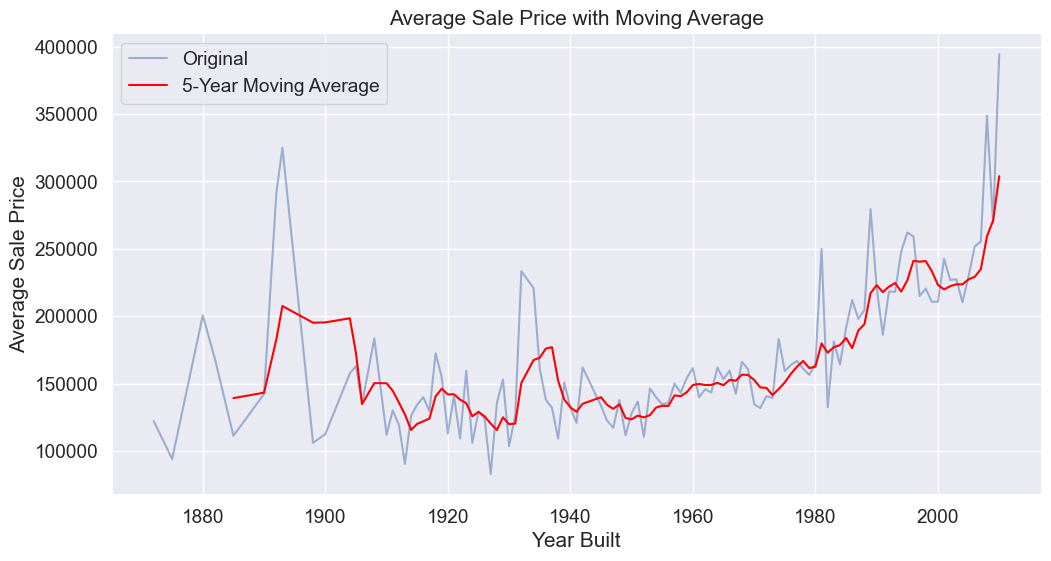

In [213]:
# Moving average to smooth data
yearly_data['SalePrice_MA'] = yearly_data['SalePrice'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['YearBuilt'], yearly_data['SalePrice'], label='Original', alpha=0.5)
plt.plot(yearly_data['YearBuilt'], yearly_data['SalePrice_MA'], label='5-Year Moving Average', color='red')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

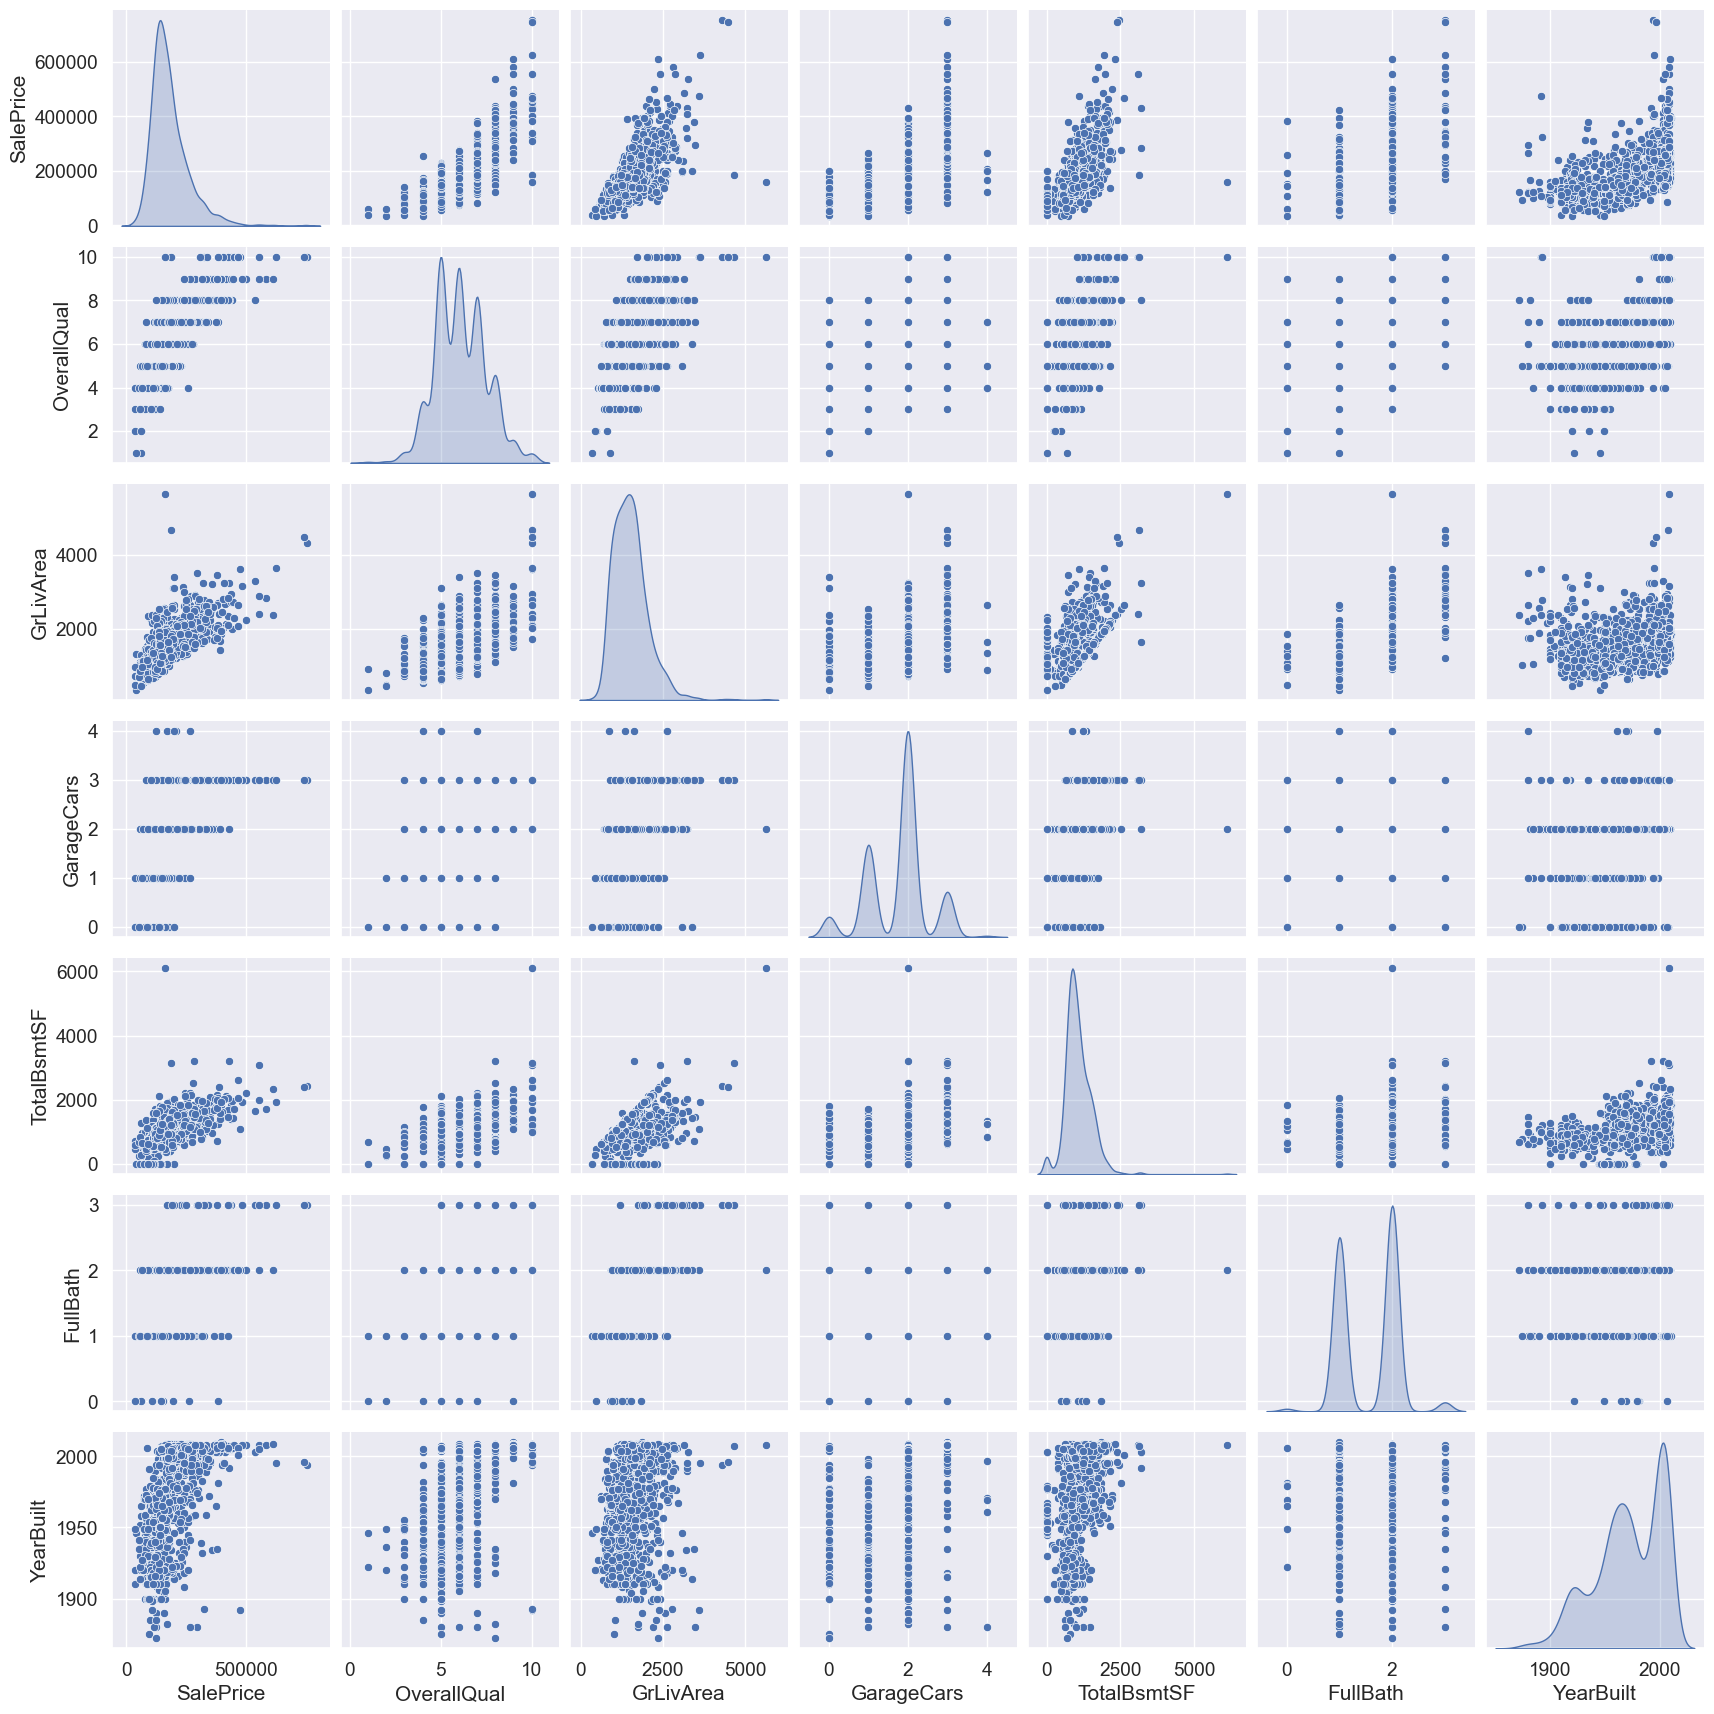

In [214]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], diag_kind='kde')
plt.show();

In [215]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Precent'])
missing_data.head(20)

,Total,Precent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [216]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [218]:
df_train.isnull().sum().max()

0